In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# load data

In [95]:
seasonal = pd.read_csv('/projects/Polygon/data/grf/seasonal.csv', index_col=0, header=0, parse_dates=True)
carry = pd.read_csv('/projects/Polygon/data/grf/carry-com.csv', index_col=0, header=0, parse_dates=True)
carry2 = pd.read_csv('/projects/Polygon/data/grf/carry-com2.csv', index_col=0, header=0, parse_dates=True)
fx = pd.read_csv('/projects/Polygon/data/grf/fx.csv', index_col=0, header=0, parse_dates=True)
cindex = pd.read_csv('/projects/Polygon/data/grf/fut1return-com.csv', header=0, index_col=0, parse_dates=True)
cindex2 = pd.read_csv('/projects/Polygon/data/grf/BCOM.csv', header=0, index_col=0, parse_dates=True)

CRet = cindex.pct_change(1).iloc[1:]
CRet2 = cindex2.pct_change(1).iloc[1:]
Cindex = (1. + CRet).cumprod()

In [96]:
fx.tail()

,SPX,TSX,FTSE,DAX,CAC,SMI,MIB,IBEX,OMX,AEX,NKY,AS51,HSI,SG
2017-12-29,116.4249,87.8434,97.3999,104.0171,104.0171,119.5037,NaN,NaN,99.5046,NaN,81.9162,91.0919,102.9206,111.2795
2018-01-31,112.8326,88.1069,99.1027,104.8062,104.8062,121.1075,NaN,NaN,100.4349,NaN,82.6808,91.9558,100.2038,111.0307
2018-02-28,114.3857,84.9256,97.8227,104.0791,104.0791,121.6351,NaN,NaN,96.7463,NaN,85.3625,89.2457,100.8626,110.6710
2018-03-30,113.3640,83.9438,99.1012,104.6365,104.6365,119.4957,NaN,NaN,95.2995,NaN,85.1118,87.4669,99.8429,111.0576
2018-04-30,113.3640,83.9438,99.1012,104.6365,104.6365,119.4957,NaN,NaN,95.2995,NaN,85.1118,87.4669,99.8429,111.0576


# CSS

In [102]:
Ret = cindex2
ret_final = Ret

w_group = ['C', 'S', 'SB', 'SM', 'W',' KC','CT']
n_w_group = [x for x in Cindex.columns if x not in w_group]
c_groups = [w_group, n_w_group]

fundwgt=1
statwgt=1

minobs=500
Expanding=0
nopos=0.4##middle section->neutral zone
MA=[x / 15 for x in [1, 2, 3, 4, 5]] #c(1,2,3,4,5)/15


CSNUM = 0.35
CSPos = 0
CS=CSNUM # assets to long and short

if CSPos ==1:
    CS=CSpostest


#Factor Portfolio construction
Assetvol=0.02
Strategyvol=0.02
SMA=20
LMA=250
Lwindow=1125
factorvol=0.02
factorsd=260
assetsd=260
statsd=260
##volupdate trigger
Volband=0.1

##carry score
# Ret=RET
seasonal[np.isnan(seasonal)]=0
# seasonal['mon']=seasonal.index.month
TSpos=fx*0
TSpos.columns=Ret.columns
# TSpos['mon'] = 


# TSRV1

In [131]:
index = cindex.loc[:, Ret.columns]


for i in range(1, 11):
    TSpos.loc[TSpos.index.month==seasonal.index[i].month, seasonal.columns] = seasonal.iloc[i+1,:len(index.columns)].values

TSRV1= TSpos *fundwgt
TSRV1

,GC,CL,NG,HG,C,S,SI,SB,XBW,SM,BO,W,KC,CT
1988-01-29,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0
1988-02-29,0.0,0.0,1.0,0.0,0.0,1.0,1.0,-1.0,0.0,1.0,1.0,-1.0,0.0,0.0
1988-03-31,0.0,-1.0,1.0,1.0,0.0,1.0,0.0,-1.0,1.0,1.0,1.0,0.0,0.0,0.0
1988-04-29,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1988-05-31,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-1.0
1988-06-30,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,-1.0
1988-07-29,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,-1.0
1988-08-31,1.0,0.0,1.0,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1988-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1988-10-31,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


# CSRV1

In [132]:
sss = carry.index.intersection(fx.index)

statday = (fx.index+pd.tseries.offsets.DateOffset(months =3)).strftime('%Y-%m').unique()
bible_idx = statday[60:len(statday)]


bible_ls = []

# why compute ave??
for i in range(len(bible_idx)):
    ave = np.mean(carry[(carry.index < bible_idx[i]) & (carry.index >= statday[i]) & (carry.index.month!= pd.to_datetime(bible_idx[i]).month)], axis=0)
    ave = ave.iloc[:len(index.columns)]
    bible_temp = np.mean(carry[(carry.index < bible_idx[i]) & (carry.index >= statday[i]) & (carry.index.month== pd.to_datetime(bible_idx[i]).month)], axis=0)
    bible_ls.append(bible_temp.iloc[:len(index.columns)])    


bible = pd.DataFrame(bible_ls, index = bible_idx)

RV1=bible.iloc[:,:len(index.columns)]
print('rv1:', RV1)

# truecount=matrix(rep(truecount,ncol(RV1)),nrow=nrow(RV1))
truecount= np.round(1 - np.sum(np.isnan(RV1), axis =1)*CS)
truecount = np.tile(truecount, (len(RV1.columns), 1))
print('truecount:' , truecount, truecount.shape)


# lower value lower rank
bibleRV = RV1.rank(axis=1, method = 'first')
bibleRV1 = (-RV1).rank(axis=1, method = 'first')
print('bibleRV: ', bibleRV)
print('bibleRV1: ', bibleRV1)



# lowest value in RV : -1(short), highest: 1 (long)
bibleRVpos=bibleRV*0
bibleRVpos[bibleRV<=truecount.T]=-1
bibleRVpos[bibleRV1<=truecount.T]=1
print('bibleRVpos: ', bibleRVpos)


CSRV = bibleRVpos.loc[:, index.columns]
CSRV = CSRV.iloc[len(fx.index)-len(CSRV.index):len(fx.index)]
CSRVorig = CSRV

bibleTS1=bible
bibleTS=bibleTS1*0
bibleTS[bibleTS1<0]=-1
bibleTS[bibleTS1>0]=1

TSRV2 = bibleTS
TSRV2 = TSRV2.iloc[len(fx.index)-len(TSRV2.index):len(fx.index), :]




rv1:                GC        CL         NG        HG         C          S  \
1993-04 -0.901900 -0.563200   7.215000 -0.650200  0.991500  -1.920600   
1993-05 -0.853400  0.156000   8.321300 -0.242900 -2.794300  -2.231900   
1993-06 -0.838600  0.463600  -2.306800  0.657900 -2.231800  -2.685100   
1993-07 -0.892600  1.392000   2.959800  0.154800 -1.233300   1.093200   
1993-08 -0.794100  1.838400   0.949700  0.200900 -4.137600  -2.099000   
1993-09 -0.700200  1.193100   8.126800 -0.800400 -4.410300  -1.956900   
1993-10 -0.719200 -0.518900   5.649000 -0.880600 -5.298900  -1.760400   
1993-11 -0.612700 -0.147800  52.475500 -1.536200 -5.828600  -1.583900   
1993-12 -0.780100 -0.876450  20.980750 -0.197700 -4.735050  -1.852850   
1994-01 -0.789350 -1.886950  -2.994050 -0.225050 -4.856250  -1.055700   
1994-02 -0.845850 -1.743300   5.025600  0.284400 -3.893800  -1.786300   
1994-03 -0.852700 -2.891800  11.687550 -0.182150 -3.302350  -1.782550   
1994-04 -0.776300 -1.489350   6.813150 -0.9783

# CSRV2 & TSRV1 ??

In [158]:
sss = carry.index.intersection(fx.index)

statday = (fx.index+pd.tseries.offsets.DateOffset(months =2)).strftime('%Y-%m').unique()
bible_idx = statday[60:len(statday)]


bible_ls = []

# why compute ave??
for i in range(len(bible_idx)):
    ave = np.mean(carry[(carry.index < bible_idx[i]) & (carry.index >= statday[i]) & (carry.index.month!= pd.to_datetime(bible_idx[i]).month)], axis=0)
    ave = ave.iloc[:len(index.columns)]
    bible_temp = np.mean(carry[(carry.index < bible_idx[i]) & (carry.index >= statday[i]) & (carry.index.month== pd.to_datetime(bible_idx[i]).month)], axis=0)
    bible_ls.append(bible_temp.iloc[:len(index.columns)])    

bible = pd.DataFrame(bible_ls, index = bible_idx)

RV1=bible.iloc[:,:len(index.columns)]
print('rv1:', RV1)

# truecount=matrix(rep(truecount,ncol(RV1)),nrow=nrow(RV1))
truecount= np.round(1 - np.sum(np.isnan(RV1), axis =1)*CS)
truecount = np.tile(truecount, (len(RV1.columns), 1))
print('truecount:' , truecount, truecount.shape)


# lower value lower rank
bibleRV = RV1.rank(axis=1, method = 'first')
bibleRV1 = (-RV1).rank(axis=1, method = 'first')
print('bibleRV: ', bibleRV)
print('bibleRV1: ', bibleRV1)



# lowest value in RV : -1(short), highest: 1 (long)
bibleRVpos=bibleRV*0
bibleRVpos[bibleRV<=truecount.T]=-1
bibleRVpos[bibleRV1<=truecount.T]=1
print('bibleRVpos: ', bibleRVpos)


CSRV2 = bibleRVpos.loc[:, index.columns]
CSRV2 = CSRV2.iloc[len(fx.index)-len(CSRV2.index):len(fx.index)]


bibleTS1=bible
bibleTS=bibleTS1*0
bibleTS[bibleTS1<0]=-1
bibleTS[bibleTS1>0]=1

TSRV1 = bibleTS
TSRV1 = TSRV1.iloc[len(fx.index)-len(TSRV1.index):len(fx.index), :]



rv1:                GC        CL         NG        HG         C          S  \
1993-03 -1.020500 -2.553600   8.074100  0.863600 -2.901600  -2.161000   
1993-04 -0.901900 -0.563200   7.215000 -0.650200  0.991500  -1.920600   
1993-05 -0.853400  0.156000   8.321300 -0.242900 -2.794300  -2.231900   
1993-06 -0.838600  0.463600  -2.306800  0.657900 -2.231800  -2.685100   
1993-07 -0.892600  1.392000   2.959800  0.154800 -1.233300   1.093200   
1993-08 -0.794100  1.838400   0.949700  0.200900 -4.137600  -2.099000   
1993-09 -0.700200  1.193100   8.126800 -0.800400 -4.410300  -1.956900   
1993-10 -0.719200 -0.518900   5.649000 -0.880600 -5.298900  -1.760400   
1993-11 -0.612700 -0.147800  52.475500 -1.536200 -5.828600  -1.583900   
1993-12 -0.780100 -0.876450  20.980750 -0.197700 -4.735050  -1.852850   
1994-01 -0.789350 -1.886950  -2.994050 -0.225050 -4.856250  -1.055700   
1994-02 -0.845850 -1.743300   5.025600  0.284400 -3.893800  -1.786300   
1994-03 -0.852700 -2.891800  11.687550 -0.1821

# CSRVcv & TSRV3

In [147]:
 np.sqrt(np.sum((Ret.index < biblecv_idx[i]) & (Ret.index >= statday[0]) & (Ret.index.month== pd.to_datetime(biblecv_idx[i]).month)))

23.473389188611005

In [148]:
sss = carry.index.intersection(fx.index)

statday = (fx.index+pd.tseries.offsets.DateOffset(months =1)).strftime('%Y-%m').unique()
biblecv_idx = statday[60:len(statday)]

bible_ls = []

# why compute ave??
for i in range(len(biblecv_idx)):
    ave = np.mean(Ret[(Ret.index < biblecv_idx[i]) & (Ret.index >= statday[0]) & (Ret.index.month!= pd.to_datetime(biblecv_idx[i]).month)], axis=0)
    ave = ave.iloc[:len(index.columns)]
    bible_temp = np.mean(Ret[(Ret.index < biblecv_idx[i]) & (Ret.index >= statday[0]) & (Ret.index.month== pd.to_datetime(biblecv_idx[i]).month)], axis=0)/ \
                np.std(Ret[(Ret.index < biblecv_idx[i]) & (Ret.index >= statday[0]) & (Ret.index.month== pd.to_datetime(biblecv_idx[i]).month)], axis=0) 
    bible_temp = bible_temp * np.sqrt(np.sum((Ret.index < biblecv_idx[i]) & (Ret.index >= statday[0]) & (Ret.index.month== pd.to_datetime(biblecv_idx[i]).month)))
    
    bible_ls.append(bible_temp.iloc[:len(index.columns)])    
print(bible_temp)    
    
    
biblecv = pd.DataFrame(bible_ls, index = biblecv_idx)

RV1=biblecv.iloc[:,:len(index.columns)]
print('rv1:', RV1)

# truecount=matrix(rep(truecount,ncol(RV1)),nrow=nrow(RV1))
truecount= np.round(1 - np.sum(np.isnan(RV1), axis =1)*CS)
truecount = np.tile(truecount, (len(RV1.columns), 1))
print('truecount:' , truecount, truecount.shape)


# lower value lower rank
bibleRV = RV1.rank(axis=1, method = 'first')
bibleRV1 = (-RV1).rank(axis=1, method = 'first')
print('bibleRV: ', bibleRV)
print('bibleRV1: ', bibleRV1)



# lowest value in RV : -1(short), highest: 1 (long)
bibleRVpos=bibleRV*0
bibleRVpos[bibleRV<=truecount.T]=-1
bibleRVpos[bibleRV1<=truecount.T]=1
print('bibleRVpos: ', bibleRVpos)


CSRVcv = bibleRVpos.loc[:, index.columns]
CSRVcv = CSRVcv.iloc[len(fx.index)-len(CSRV.index):len(fx.index)]

bibleTS1=bible
bibleTS=bibleTS1*0
bibleTS[bibleTS1<0]=-1
bibleTS[bibleTS1>0]=1

TSRV3 = bibleTS
TSRV3 = TSRV3.iloc[len(fx.index)-len(TSRV3.index):len(fx.index), :]




GC     49.927387
CL     34.545768
NG     29.178578
HG     37.498816
C      31.701145
S      51.761486
SI     40.672820
SB     87.484317
XBW    39.647418
SM     26.675067
BO     71.388668
W      25.418880
KC     28.201515
CT     31.467382
dtype: float64
rv1:                   GC          CL          NG           HG           C  \
1993-02   623.402104  169.617447  148.795810   212.332205  488.513084   
1993-03   314.265334  330.591496   96.992574   949.273232  379.920919   
1993-04   720.244784  357.661241  129.811777   362.346383  250.308809   
1993-05  1466.483478  196.732281   91.213088  1069.855044  341.481825   
1993-06   784.879149  445.247644  214.239666   208.862418  218.249826   
1993-07   343.643209  387.090533   75.160194   332.534867   99.889803   
1993-08   245.869902  600.818243  207.250617   386.547080  334.481279   
1993-09   465.724649  543.811014   65.569399   210.012077  308.196689   
1993-10   361.999988  225.586644  145.724095   478.762284  444.553734   
1993-11   65

# CSRVcv2 & TSRV4

In [149]:
sss = carry.index.intersection(fx.index)

statday = (fx.index+pd.tseries.offsets.DateOffset(months =2)).strftime('%Y-%m').unique()
biblecv_idx = statday[60:len(statday)]

bible_ls = []

# why compute ave??
for i in range(len(biblecv_idx)):
    ave = np.mean(Ret[(Ret.index < biblecv_idx[i]) & (Ret.index >= statday[0]) & (Ret.index.month!= pd.to_datetime(biblecv_idx[i]).month)], axis=0)
    ave = ave.iloc[:len(index.columns)]
    bible_temp = np.mean(Ret[(Ret.index < biblecv_idx[i]) & (Ret.index >= statday[0]) & (Ret.index.month== pd.to_datetime(biblecv_idx[i]).month)], axis=0)/ \
                np.std(Ret[(Ret.index < biblecv_idx[i]) & (Ret.index >= statday[0]) & (Ret.index.month== pd.to_datetime(biblecv_idx[i]).month)], axis=0) 
    bible_temp = bible_temp * np.sqrt(np.sum((Ret.index < biblecv_idx[i]) & (Ret.index >= statday[0]) & (Ret.index.month== pd.to_datetime(biblecv_idx[i]).month)))
    bible_ls.append(bible_temp.iloc[:len(index.columns)])    
        
    
biblecv = pd.DataFrame(bible_ls, index = biblecv_idx)

RV1=biblecv.iloc[:,:len(index.columns)]
print('rv1:', RV1)

# truecount=matrix(rep(truecount,ncol(RV1)),nrow=nrow(RV1))
truecount= np.round(1 - np.sum(np.isnan(RV1), axis =1)*CS)
truecount = np.tile(truecount, (len(RV1.columns), 1))
print('truecount:' , truecount, truecount.shape)


# lower value lower rank
bibleRV = RV1.rank(axis=1, method = 'first')
bibleRV1 = (-RV1).rank(axis=1, method = 'first')
print('bibleRV: ', bibleRV)
print('bibleRV1: ', bibleRV1)



# lowest value in RV : -1(short), highest: 1 (long)
bibleRVpos=bibleRV*0
bibleRVpos[bibleRV<=truecount.T]=-1
bibleRVpos[bibleRV1<=truecount.T]=1
print('bibleRVpos: ', bibleRVpos)


CSRVcv = bibleRVpos.loc[:, index.columns]
CSRVcv = CSRVcv.iloc[len(fx.index)-len(CSRV.index):len(fx.index)]

bibleTS1=bible
bibleTS=bibleTS1*0
bibleTS[bibleTS1<0]=-1
bibleTS[bibleTS1>0]=1

TSRV4 = bibleTS
TSRV4 = TSRV4.iloc[len(fx.index)-len(TSRV4.index):len(fx.index), :]




rv1:                   GC          CL          NG           HG           C  \
1993-03   314.265334  330.591496   96.992574   949.273232  379.920919   
1993-04   720.244784  357.661241  129.811777   362.346383  250.308809   
1993-05  1466.483478  196.732281   91.213088  1069.855044  341.481825   
1993-06   784.879149  445.247644  214.239666   208.862418  218.249826   
1993-07   343.643209  387.090533   75.160194   332.534867   99.889803   
1993-08   245.869902  600.818243  207.250617   386.547080  334.481279   
1993-09   465.724649  543.811014   65.569399   210.012077  308.196689   
1993-10   361.999988  225.586644  145.724095   478.762284  444.553734   
1993-11   650.710437  403.155014   86.555284   287.441034  296.605740   
1993-12   255.458310  276.833809   68.346931   267.072630   84.705881   
1994-01   124.631373  258.293656   32.203429   201.008519   46.237159   
1994-02   124.960695  177.997028   22.455220   287.300471   37.622123   
1994-03   180.706813  157.707202   21.753551  

In [159]:
AAA = TSRV4.index.intersection(TSRV3.index.intersection(TSRV1.index.intersection(TSRV2.index)))

TSRV1 = TSRV1.loc[AAA, :]
TSRV2 = TSRV2.loc[AAA, :]
TSRV3 = TSRV3.loc[AAA, :]
TSRV4 = TSRV4.loc[AAA, :]


TSRV=TSRV1+TSRV2 + TSRV3 + TSRV4

AAA = pd.Index(TSRV.index).intersection(CSRV.index)
CSRV = CSRV.loc[AAA,:]
CSRV2 = CSRV2.loc[AAA,:]
TSRV = TSRV.loc[AAA,:]
CSRVcv = CSRVcv.loc[AAA,:]
CSRVcv2 = CSRVcv2.loc[AAA,:]

CSRV=CSRV+CSRV2+CSRVcv+CSRVcv2

#     print(CSRV.tail())
#     print(TSRV.tail())

# if(statrun==1){
#   TSRVrun1=TSRV
#   CSRVrun1=CSRV

# }
# if(statrun==2){
#   TSRVrun2=TSRV
#   CSRVrun2=CSRV
# }
if statrun==0:
  TSRVrun1=TSRV
  CSRVrun1=CSRV


if statrun==1:
  TSRVrun2=TSRV
  CSRVrun2=CSRV

NameError: name 'CSRVcv2' is not defined

In [154]:
def ex_ante_vol(df_ret, todate, weights, lookback=130, shrink_corr=0.9):
    '''
    Args:
        df_ret: pandas DataFrame of returns
        todate: date to calculate ex ante vol
        weights: weight of strategy before ex ante vol control
        lookback: number of days to consider for calculating cov
        shrink_corr: weight to shrink correlation
    '''
    # setting data range
    todate_loc = df_ret.index.get_loc(todate)
    if todate_loc > lookback:
        fromdate_loc = todate_loc - lookback
    else:
        fromdate_loc = 0
    
    # calculate corr apply shrinkage
    corr = df_ret.iloc[fromdate_loc:todate_loc].corr()
    corr = corr * shrink_corr + np.diag(np.ones(len(df_ret.columns))) * (1.- shrink_corr)
    # calculate cov
    std = df_ret.iloc[fromdate_loc:todate_loc].std()
    cov = pd.DataFrame(np.diag(std).dot(corr).dot(np.diag(std)), index=RET.columns, columns=RET.columns)
    # calculate ex ante vol
    return np.sqrt(weights.dot(cov).dot(weights)) * np.sqrt(260)

class GRP_bt:
    '''
    '''
    def __init__(self, CSLS, RET, RB, min_vol, freq):
        '''
        '''
        self.CSLS = CSLS  # Cross Sectional Exposure Type. 'vol' means volatility allocation. 'notional' means notional. 
        self.RET = RET  # 
        self.RB = RB
        
        self.Assetvol = 0.02 # vol control parameter for individual assets
        self.Strategyvol = 0.02 # vol control parameter for whole strategy
        self.factorvol = 0.02
        self.factorsd = 260 # lookback period for calcualting factorvol
        self.assetsd = 90 # lookback period for calculating Assetvol
        self.statsd = 90 # lookback period for calcualting Strategyvol

        self.volband = 0.05 # if controled vol is within volband, do not change vol
        self.min_vol = min_vol # vol floor 0.04 for ir strategy, 0.15 for all otheres
        self.freq = freq # strategy frequency setting. it only applys to Cross Sectional backtesting now.
        
        # Calculating volatility for assets
        std = (self.RET.rolling(window=self.assetsd).std() * np.sqrt(260)).iloc[self.assetsd:]
        # Adjust calculated asset volatility
        self.std_adj = self.adjust_by_volband(std, self.volband, min_vol=self.min_vol)

    def adjust_by_volband(self, df_vol, volband, min_vol=None):
        for i in range(1, len(df_vol.index)):
            if df_vol.iloc[i].name.weekday() == self.RB:
                for c in range(len(df_vol.columns)):
                    # case1. if new std is null
                    if pd.isnull(df_vol.iloc[i, c]):
                        df_vol.iloc[i, c] = df_vol.iloc[i-1, c]
                    # case2. if new std within volband
                    if abs(df_vol.iloc[i, c] - df_vol.iloc[i-1, c]) < volband * df_vol.iloc[i-1, c] :
                        df_vol.iloc[i, c] = df_vol.iloc[i-1, c]
            else:
                df_vol.iloc[i] = df_vol.iloc[i-1]
        if min_vol is not None:
            df_vol[df_vol < min_vol] = min_vol

        return df_vol
    
    def ts_vol_control_backtest(self, TSRV):
        # Time Series 
        VCweight = self.Assetvol / self.std_adj
        VCTSpos = (VCweight * TSRV).loc[TSRV.index[0]:] # Vol Control Time Series Position
        VCTSpos.replace([np.inf, -np.inf], np.nan, inplace=True)
        
        # Strategy level vol control
        # return of VC strategy
        Strategy = ((self.RET * VCTSpos.shift(1)).sum(axis=1)).loc[TSRV.index[0]:]
        # using average of expanding & moving window strategy risk
        Strategyrisk_expanding = (Strategy.expanding(min_periods=self.statsd).std()*np.sqrt(260)).iloc[self.statsd:]
        Strategyrisk_rolling = (Strategy.rolling(window=self.statsd).std()*np.sqrt(260)).iloc[self.statsd:]
        Strategyrisk = (Strategyrisk_expanding + Strategyrisk_rolling) / 2.
        # volband adjustment
        bufrisk = self.adjust_by_volband(Strategyrisk.copy().to_frame(), self.volband)
        # apply strategy level vol control to position
        statlev = self.Strategyvol / bufrisk.iloc[:,0]
        self.TSposition = VCTSpos.multiply(statlev, axis='index').iloc[self.statsd:]
        self.TSposition.replace([np.inf, -np.inf], np.nan, inplace=True)
        self.TSposition.fillna(0, inplace=True)
        
        # calculate daily strategy return
        self.TSStrategy = (self.RET * self.TSposition.shift(1)).sum(axis=1).loc[TSRV.index[0]:]
        self.TSStrategylag = (self.RET * self.TSposition.shift(2)).sum(axis=1).loc[TSRV.index[0]:]
    
    def cs_vol_control_backtest(self, CSRV):
        if self.CSLS == 'vol':
            CSRV = (CSRV * self.Assetvol / self.std_adj).loc[CSRV.index[0]:]
        #elif self.CSLS != 'notional': # raise error
            
        # Calculating Ex-ante Vol and adjust to target vol which specified by 'Strategyvol'
        if self.freq == 'week':
            for i in range(len(CSRV.index)):
                if CSRV.iloc[i].name.weekday() == self.RB:
                    CSRV.iloc[i] = CSRV.iloc[i] * self.Strategyvol / ex_ante_vol(self.RET, CSRV.iloc[i].name, CSRV.iloc[i])
                else:
                    CSRV.iloc[i] = CSRV.iloc[i-1]
        elif self.freq == 'month':
            for i in range(len(CSRV.index)):
                if CSRV.iloc[i].name.month != CSRV.iloc[i-1].name.month:
                    CSRV.iloc[i] = CSRV.iloc[i] * self.Strategyvol / ex_ante_vol(self.RET, CSRV.iloc[i].name, CSRV.iloc[i])
                else:
                    CSRV.iloc[i] = CSRV.iloc[i-1]
        #else: # raise error
            
        # Strategy level vol control
        # return of VC strategy
        CSraw = (self.RET * CSRV.shift(1)).dropna(how='all').sum(axis=1)
        CSrisk = (CSraw.rolling(window=self.statsd).std()*np.sqrt(260)).iloc[self.statsd:]
        
        # volband adjustment
        cs_bufrisk = self.adjust_by_volband(CSrisk.to_frame(), self.volband)
        # apply strategy level vol control to position
        cs_statlev = self.Strategyvol / cs_bufrisk.iloc[:,0]
        self.CSposition = CSRV.multiply(cs_statlev, axis='index').iloc[self.statsd:]
        self.CSposition.replace([np.inf, -np.inf], np.nan, inplace=True)
        self.CSposition.fillna(0, inplace=True)
        
        # calculate daily strategy return
        self.CSStrategy = (self.RET * self.CSposition.shift(1)).sum(axis=1).loc[CSRV.index[0]:]
        self.CSStrategylag = (self.RET * self.CSposition.shift(2)).sum(axis=1).loc[CSRV.index[0]:]

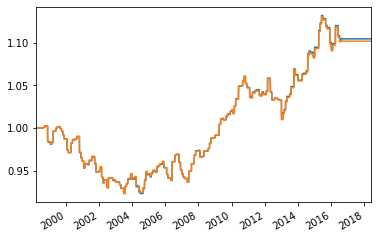

In [161]:
RB = 1
min_vol = .15
freq = 'month'

GRP_bt_test = GRP_bt('vol', Ret, RB, min_vol, freq)
GRP_bt_test.ts_vol_control_backtest(CSRV)

(1. + GRP_bt_test.TSStrategy).cumprod().plot()
(1. + GRP_bt_test.TSStrategylag).cumprod().plot()